In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.probability import FreqDist

In [2]:
df = pd.read_csv('processed_netflix.csv', parse_dates=[6])

In [3]:
df.head()

,#,show_id,type,title,country,release_year,date_added,director,cast,rating,listed_in,description,duration,duration_hours
0,1,s1,Movie,Dick Johnson Is Dead,United States,2020,2021-09-25,Kirsten Johnson,NaN,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90 min,1 hr 30 min
1,2,s2,TV Show,Blood & Water,South Africa,2021,2021-09-24,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2 Seasons,2 Seasons
2,3,s3,TV Show,Ganglands,NaN,2021,2021-09-24,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1 Season,1 Season
3,4,s4,TV Show,Jailbirds New Orleans,NaN,2021,2021-09-24,NaN,NaN,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1 Season,1 Season
4,5,s5,TV Show,Kota Factory,India,2021,2021-09-24,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2 Seasons,2 Seasons


In [4]:
df['show_id'] = df['show_id'].apply(lambda x:int(x[1:]))

In [5]:
# set index
df.set_index('show_id', inplace=True)
df.drop('#',axis=1,inplace=True)

In [6]:
# confirm changes
df.head(1)

,type,title,country,release_year,date_added,director,cast,rating,listed_in,description,duration,duration_hours
show_id,,,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,United States,2020,2021-09-25,Kirsten Johnson,NaN,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90 min,1 hr 30 min


In [7]:
# save the column names for future use.
cols = [i for i in df.columns]
print(cols)

['type', 'title', 'country', 'release_year', 'date_added', 'director', 'cast', 'rating', 'listed_in', 'description', 'duration', 'duration_hours']


In [8]:
#  get the count of rows and columns
df.shape

(8805, 12)

In [9]:
# get the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8805 entries, 1 to 8807
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   type            8805 non-null   object        
 1   title           8805 non-null   object        
 2   country         7974 non-null   object        
 3   release_year    8805 non-null   int64         
 4   date_added      8795 non-null   datetime64[ns]
 5   director        6172 non-null   object        
 6   cast            7980 non-null   object        
 7   rating          8801 non-null   object        
 8   listed_in       8805 non-null   object        
 9   description     8805 non-null   object        
 10  duration        8802 non-null   object        
 11  duration_hours  8802 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 894.3+ KB


## There are 8805 rows, 12 columns, all except release_year is of type object.

## release_year is of type datetime. 
## Since released_year is just the year, int is fine and it doesnt have to be datetime.

# BASIC ANALYSIS :

## Question : What are the different types of genres available in the dataset?

In [10]:
# there is a white space that needs to removed
df['listed_in'][2].split(',')

['International TV Shows', ' TV Dramas', ' TV Mysteries']

In [11]:
# lstrip is used to remove the whitespace from the left side of a string
[i.lstrip() for i in (df['listed_in'][2]).split(',')]

['International TV Shows', 'TV Dramas', 'TV Mysteries']

In [12]:
# store the splited values into a variable
listed_in = df['listed_in'].apply(lambda x:x.split(','))
listed_in[:5]

show_id
1                                      [Documentaries]
2    [International TV Shows,  TV Dramas,  TV Myste...
3    [Crime TV Shows,  International TV Shows,  TV ...
4                            [Docuseries,  Reality TV]
5    [International TV Shows,  Romantic TV Shows,  ...
Name: listed_in, dtype: object

In [13]:
# create a function that removes white-space of all strings in a list
def remove_white(lst):
    new_lst = []
    for i in lst:
        i = i.strip()
        new_lst.append(i)
    return new_lst

In [14]:
# apply the function mentioned above
listed_in = listed_in.apply(lambda x:remove_white(x))
listed_in[:5]

show_id
1                                      [Documentaries]
2    [International TV Shows, TV Dramas, TV Mysteries]
3    [Crime TV Shows, International TV Shows, TV Ac...
4                             [Docuseries, Reality TV]
5    [International TV Shows, Romantic TV Shows, TV...
Name: listed_in, dtype: object

In [15]:
unique_listed_in = set()

In [16]:
def push_to_set(lst, set_name):
    for i in lst:
        set_name.add(i)

In [17]:
listed_in.apply(lambda x:push_to_set(x, unique_listed_in))

show_id
1       None
2       None
3       None
4       None
5       None
        ... 
8803    None
8804    None
8805    None
8806    None
8807    None
Name: listed_in, Length: 8805, dtype: object

In [18]:
# these are all the unique genres of shows/movies present in the dataset.
print(unique_listed_in)

{'Docuseries', 'TV Dramas', 'TV Comedies', 'Anime Series', 'Horror Movies', 'Reality TV', 'Documentaries', 'Music & Musicals', 'Classic Movies', 'Dramas', 'Action & Adventure', 'Stand-Up Comedy & Talk Shows', 'Thrillers', 'Romantic Movies', 'Cult Movies', "Kids' TV", 'International TV Shows', 'Children & Family Movies', 'Classic & Cult TV', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Thrillers', 'Korean TV Shows', 'TV Shows', 'Stand-Up Comedy', 'Comedies', 'Anime Features', 'Movies', 'Independent Movies', 'International Movies', 'Sci-Fi & Fantasy', 'Teen TV Shows', 'Science & Nature TV', 'TV Action & Adventure', 'Sports Movies', 'British TV Shows', 'Faith & Spirituality', 'Spanish-Language TV Shows', 'Crime TV Shows', 'Romantic TV Shows', 'LGBTQ Movies'}


### NOTE :

In [19]:
# we could get the list of strings stripped of white-space, just use ', ' with a space after , when you call split
# the issue caomes when there is no space, so to be safe use split by ','
df['listed_in'].apply(lambda x:x.split(', '))[2]

['International TV Shows', 'TV Dramas', 'TV Mysteries']

## Question : What are the different types available and how many of them ?

In [20]:
df['type'].value_counts()

Movie      6129
TV Show    2676
Name: type, dtype: int64

### There are 2 types: 6129 movies and 2676 TV Show's. 

## Question : Which countries have the highest number of shows/movies on Netflix?

In [24]:
# this is not the correct amount
df.groupby('country').count()['type']

country
, France, Algeria                                       1
, South Korea                                           1
Argentina                                              56
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile                                        2
                                                       ..
Venezuela                                               1
Venezuela, Colombia                                     1
Vietnam                                                 7
West Germany                                            1
Zimbabwe                                                1
Name: type, Length: 748, dtype: int64

In [25]:
# there are some rows with multiple countries
df['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             418
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [26]:
df['country'].isna().value_counts()

False    7974
True      831
Name: country, dtype: int64

In [27]:
# first lets remove the nans for ease of analysis
df['country'].fillna('not available', inplace=True)

In [28]:
# confirm no more null values
df['country'].isna().sum()

0

In [29]:
df['country'].replace('','not available', inplace=True)

In [30]:
# removed all empty strings
(df['country'] == '').sum()

0

In [31]:
# removed all nans
df['country'].isna().value_counts()

False    8805
Name: country, dtype: int64

### See unusual cases :

In [32]:
test = df['country'].str.split(', ')

In [33]:
def check(lst):
    for country in lst:
        if ',' in country:
            return True
        else:
            return False

In [34]:
df[test.apply(lambda x: check(x))]

,type,title,country,release_year,date_added,director,cast,rating,listed_in,description,duration,duration_hours
show_id,,,,,,,,,,,,
1193,Movie,The Present,"United Kingdom,",2020,2021-03-18,Farah Nabulsi,"Saleh Bakri, Maryam Kanj, Maryam Kamiel Basha,...",TV-MA,"Dramas, International Movies",Yusuf and his daughter set out to buy his wife...,24 min,0 hr 24 min
4654,Movie,City of Joy,"United States,",2018,2018-09-07,Madeleine Gavin,NaN,TV-MA,Documentaries,Women who've been sexually brutalized in war-t...,77 min,1 hr 17 min
5926,Movie,Virunga,"United Kingdom,",2014,2014-11-07,Orlando von Einsiedel,NaN,TV-MA,"Documentaries, International Movies",The Oscar-nominated true story of the rangers ...,100 min,1 hr 40 min
7008,Movie,Hotel Pacific,"Poland,",1975,2019-10-01,Janusz Majewski,"Marek Kondrat, Roman Wilhelmi, Roman Skamene, ...",TV-MA,"Classic Movies, Dramas, International Movies",A motivated teen strives to rise from dishwash...,96 min,1 hr 36 min


### it is clear from the above results, that if we had used ', ' with a space to split the string, we would have got the wrong results because we would have both 'United Kingdom' and 'United Kingdom,' in our countries.

In [236]:
countries = df['country'].apply(lambda x:x.split(','))

In [237]:
countries = countries.apply(lambda x:remove_white(x))

In [238]:
unique_countries = set()

In [239]:
countries.apply(lambda x:push_to_set(x, unique_countries))

show_id
1       None
2       None
3       None
4       None
5       None
        ... 
8803    None
8804    None
8805    None
8806    None
8807    None
Name: country, Length: 8805, dtype: object

In [39]:
# unique_countries

# {'',
#  'Afghanistan',
#  'Albania',
#  'Algeria',
#  'Angola',
#  'Argentina',
#  'Armenia',
#  'Australia',

In [240]:
country_dict = {key:0 for key in unique_countries}

In [41]:
# country_dict

# {'South Africa': 64,
#  'Philippines': 83,
#  'Belgium': 90,
#  'Puerto Rico': 1,
#  'Zimbabwe': 3,
#  'Cuba': 1,

In [241]:
# remove unacessary keys
del country_dict['']

In [242]:
del country_dict['not available']

In [243]:
def update_dict(lst, dict_name):
    try:
        for i in lst:
                dict_name[i] = dict_name[i] + 1  
    except:
        pass

In [244]:
countries.apply(lambda x:update_dict(x, country_dict))

show_id
1       None
2       None
3       None
4       None
5       None
        ... 
8803    None
8804    None
8805    None
8806    None
8807    None
Name: country, Length: 8805, dtype: object

In [46]:
# country_dict

# {'South Africa': 62,
#  'Philippines': 83,
#  'Belgium': 90,
#  'Puerto Rico': 1,
#  'Zimbabwe': 3,
#  'Cuba': 1,
#  'Australia': 160,
#  'Pakistan': 24,

In [245]:
pop_country = pd.DataFrame(list(country_dict.items()), columns=['Country','Count'])
pop_country.head()

,Country,Count
0,Germany,226
1,West Germany,5
2,Kenya,6
3,Armenia,1
4,Turkey,113


In [246]:
pop_country.sort_values(by='Count',ascending=False).head(5).set_index('Country')

,Count
Country,
United States,3690
India,1046
United Kingdom,805
Canada,445
France,392


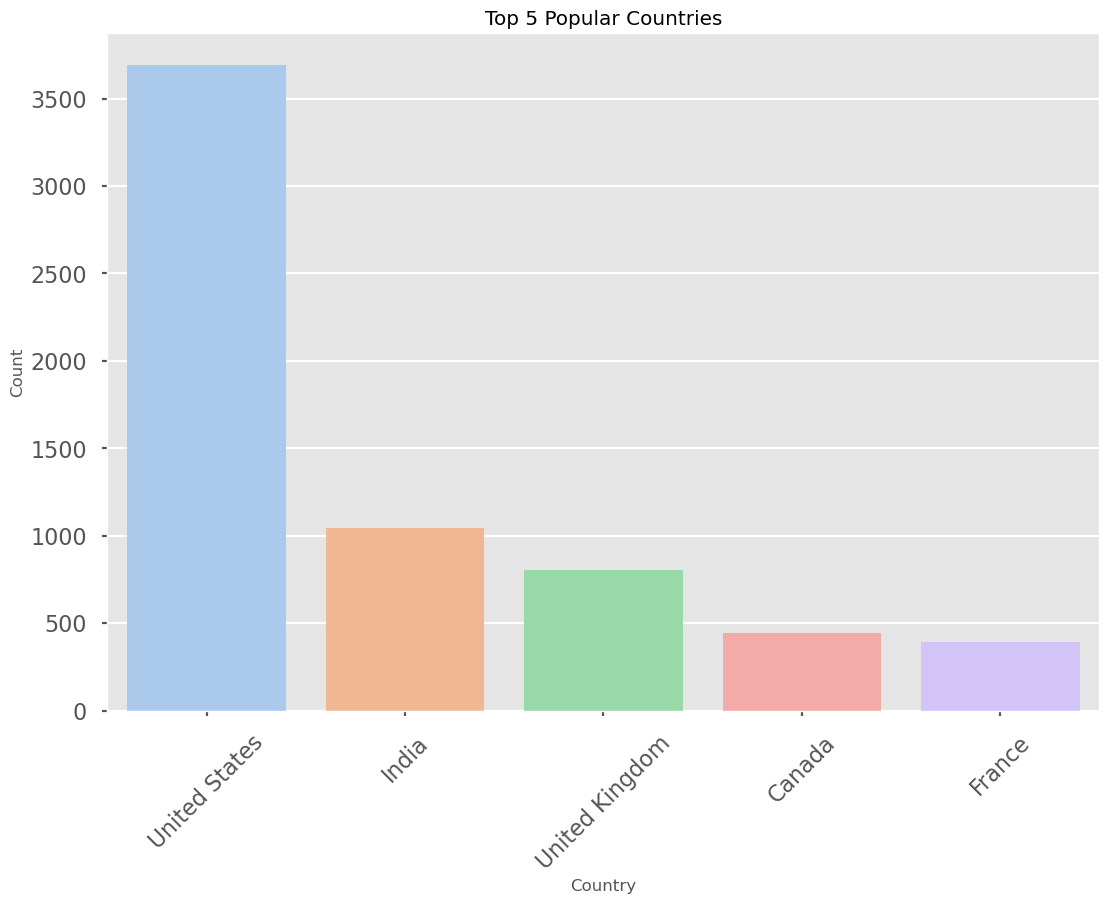

In [154]:
# Define the colors to use for the plot
colors = sns.color_palette('pastel')[0:5]

# Create a bar plot using Seaborn
sns.barplot(x='Country', y='Count', data=pop_country.sort_values(by='Count',ascending=False).head(5), palette=colors)

# Set the axis labels
plt.xlabel('Country')
plt.ylabel('Count')

plt.title('Top 5 Popular Countries')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [50]:
# confirming solution :
df['country'].str.contains('United States').sum()

3690

In [337]:
df['country'].str.contains('India').sum()

1046

### United States has the most shows/movies (3690) 
### India is ranked #2 with 1046 movies. 

# Question : What is the most common rating in the dataset?

In [52]:
df['rating'].value_counts().head(1)

TV-MA    3207
Name: rating, dtype: int64

### TV-MA is a rating assigned by the TV Parental Guidelines to television programs that contain mature content and may not be suitable for children under the age of 17. It stands for "Television - Mature Audience".

#  Question : Which director has directed the highest number of shows/movies on Netflix?

In [53]:
# remove nans
df['director'].fillna('not available', inplace=True)

In [54]:
df['director']

show_id
1       Kirsten Johnson
2         not available
3       Julien Leclercq
4         not available
5         not available
             ...       
8803      David Fincher
8804      not available
8805    Ruben Fleischer
8806       Peter Hewitt
8807        Mozez Singh
Name: director, Length: 8805, dtype: object

In [338]:
directors = df['director'].apply(lambda x:remove_white(x.split(',')))

In [340]:
# create an empty set to push to all the directors:
unique_directors = set()

In [341]:
directors.apply(lambda x:push_to_set(x, unique_directors))

show_id
1       None
2       None
3       None
4       None
5       None
        ... 
8803    None
8804    None
8805    None
8806    None
8807    None
Name: director, Length: 8805, dtype: object

In [342]:
directors_dict = {key:0 for key in unique_directors}

In [343]:
directors.apply(lambda x:update_dict(x, directors_dict))

show_id
1       None
2       None
3       None
4       None
5       None
        ... 
8803    None
8804    None
8805    None
8806    None
8807    None
Name: director, Length: 8805, dtype: object

In [344]:
pop_directors = pd.DataFrame(list(directors_dict.items()), columns=['Director','Count'])

In [345]:
pop_directors.sort_values(by='Count',ascending=False).iloc[1:6]

,Director,Count
3114,Rajiv Chilaka,22
178,Jan Suter,21
3805,Raúl Campos,19
1484,Suhas Kadav,16
3941,Marcus Raboy,16


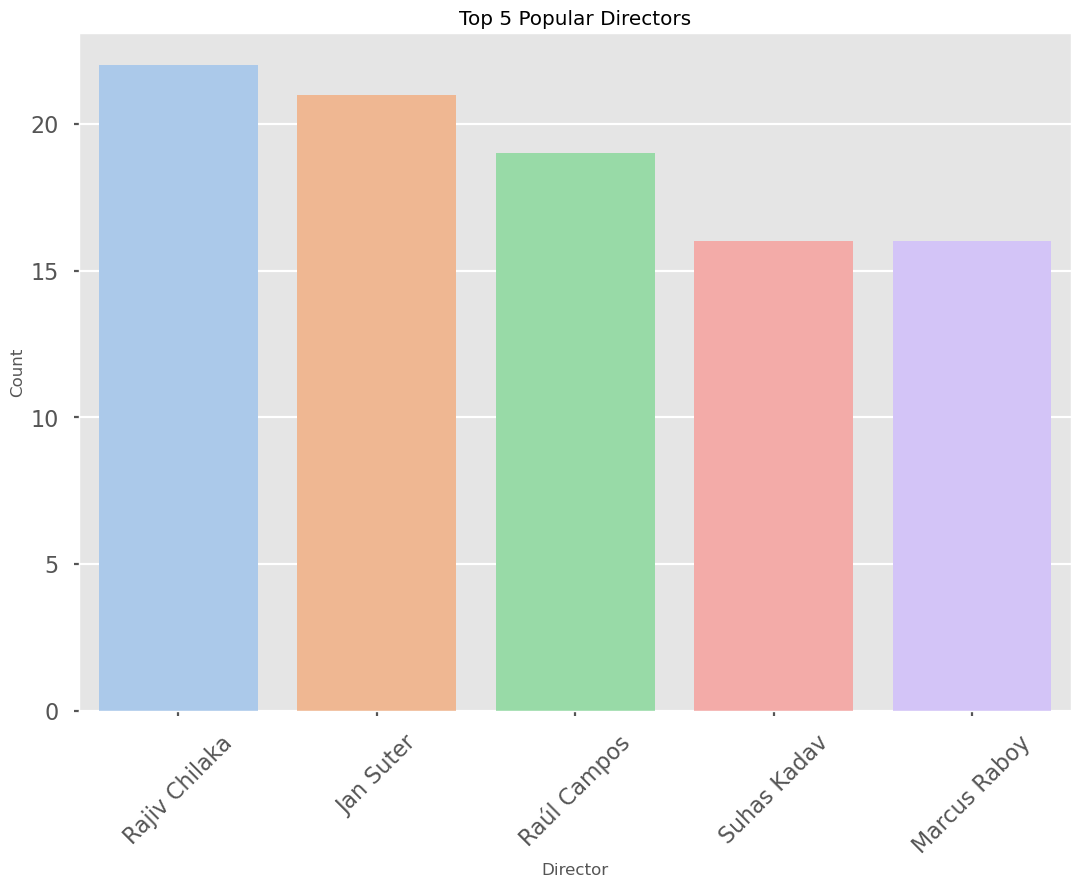

In [346]:
# Define the colors to use for the plot
colors = sns.color_palette('pastel')[0:5]

# Create a bar plot using Seaborn
sns.barplot(x='Director', y='Count', data=pop_directors.sort_values(by='Count',ascending=False).iloc[1:6], palette=colors)

# Set the axis labels
plt.xlabel('Director')
plt.ylabel('Count')

plt.title('Top 5 Popular Directors')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Confirm solutions :

In [64]:
df['director'].str.contains('Rajiv Chilaka').sum()

22

In [65]:
df['director'].str.contains('Jan Suter').sum()

21

# Question : What is the trend of the number of shows/movies released on Netflix over the years?

In [66]:
# use a subset for this query
type_df = df[['type','date_added']]

# exclude nans
type_df = type_df[type_df['date_added'].notna()]

# get the year
type_df['date_added'] = type_df['date_added'].apply(lambda x:x.year)

# convert to a dataframe
type_df = pd.DataFrame(type_df.groupby(['date_added','type']).value_counts())
type_df.head()

0
date_added type       
2008       Movie     1
           TV Show   1
2009       Movie     2
2010       Movie     1
2011       Movie    13

In [67]:
type_df = type_df.rename(columns={0: 'count'})
type_df = type_df.reset_index().set_index('date_added')
type_df.head()

,type,count
date_added,,
2008,Movie,1
2008,TV Show,1
2009,Movie,2
2010,Movie,1
2011,Movie,13


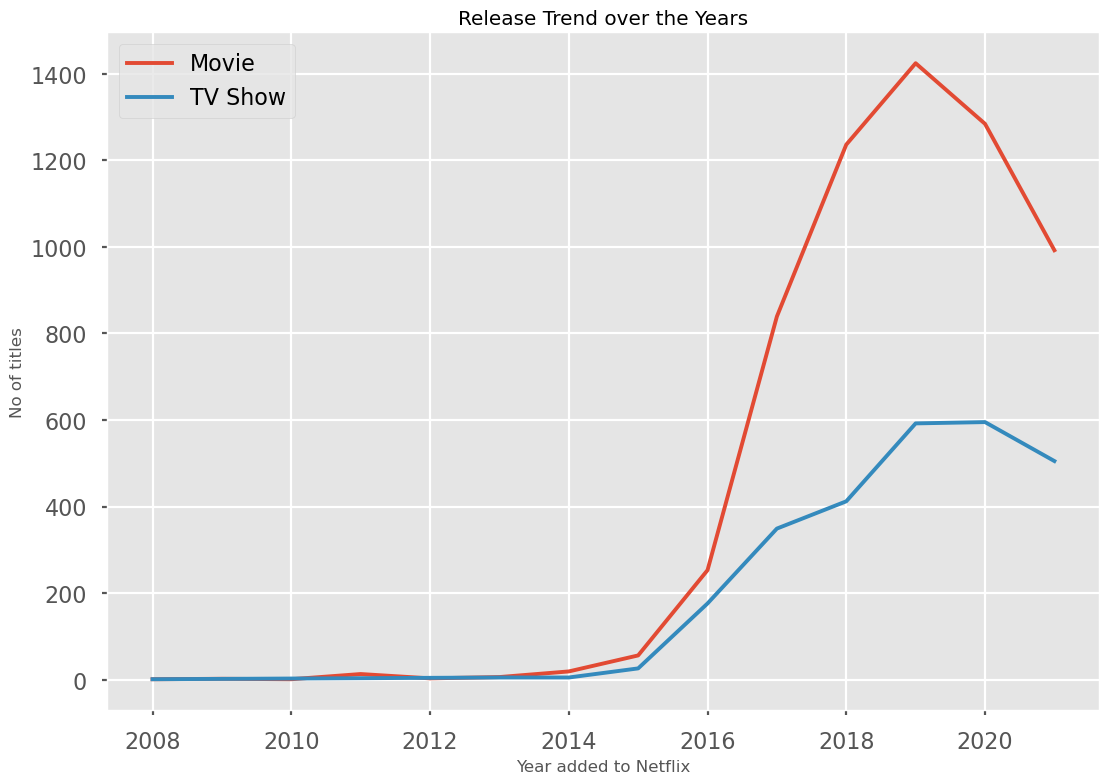

In [405]:
# Create a new figure and axes
fig, ax = plt.subplots()

# Filter the DataFrame by 'Movie' type and plot the data
type_df[type_df['type'] == 'Movie'].plot(ax=ax, y='count', label='Movie')

# Filter the DataFrame by 'TV Show' type and plot the data on the same axes
type_df[type_df['type'] == 'TV Show'].plot(ax=ax, y='count', label='TV Show')

# Add a legend to the plot
ax.legend()

plt.ylabel('No of titles')
plt.xlabel('Year added to Netflix')

plt.title('Release Trend over the Years')

# Show the plot
plt.show()

### Based on the results of the analysis, we can see that both the number of TV shows and movies released on Netflix has been increasing steadily over the years. The growth of TV Series was significantly lower than movies.

### Overall, the data suggests that Netflix has been increasingly focusing on producing and releasing more TV shows in recent years, possibly due to their popularity and the changing preferences of their audience. However, Netflix is still producing and releasing a significant number of movies each year, and is likely to continue to do so in the future. It is good to keep in mind that the rate of movies released is declining recently, but it cant be confirmed if the trend would stick or if there is a chance of an upwards trend over the years. Only time can tell. 

# Question : What are the top 15 most common genres of shows/movies on Netflix?


In [70]:
# we already have a set called unique_listed_in where we have all the unique genres
listed_dict = {key:0 for key in unique_listed_in}

In [71]:
listed_in.apply(lambda x:update_dict(x, listed_dict))

show_id
1       None
2       None
3       None
4       None
5       None
        ... 
8803    None
8804    None
8805    None
8806    None
8807    None
Name: listed_in, Length: 8805, dtype: object

In [403]:
pop_genres.head(2)

,Genre,Count
30,International Movies,2751
9,Dramas,2426


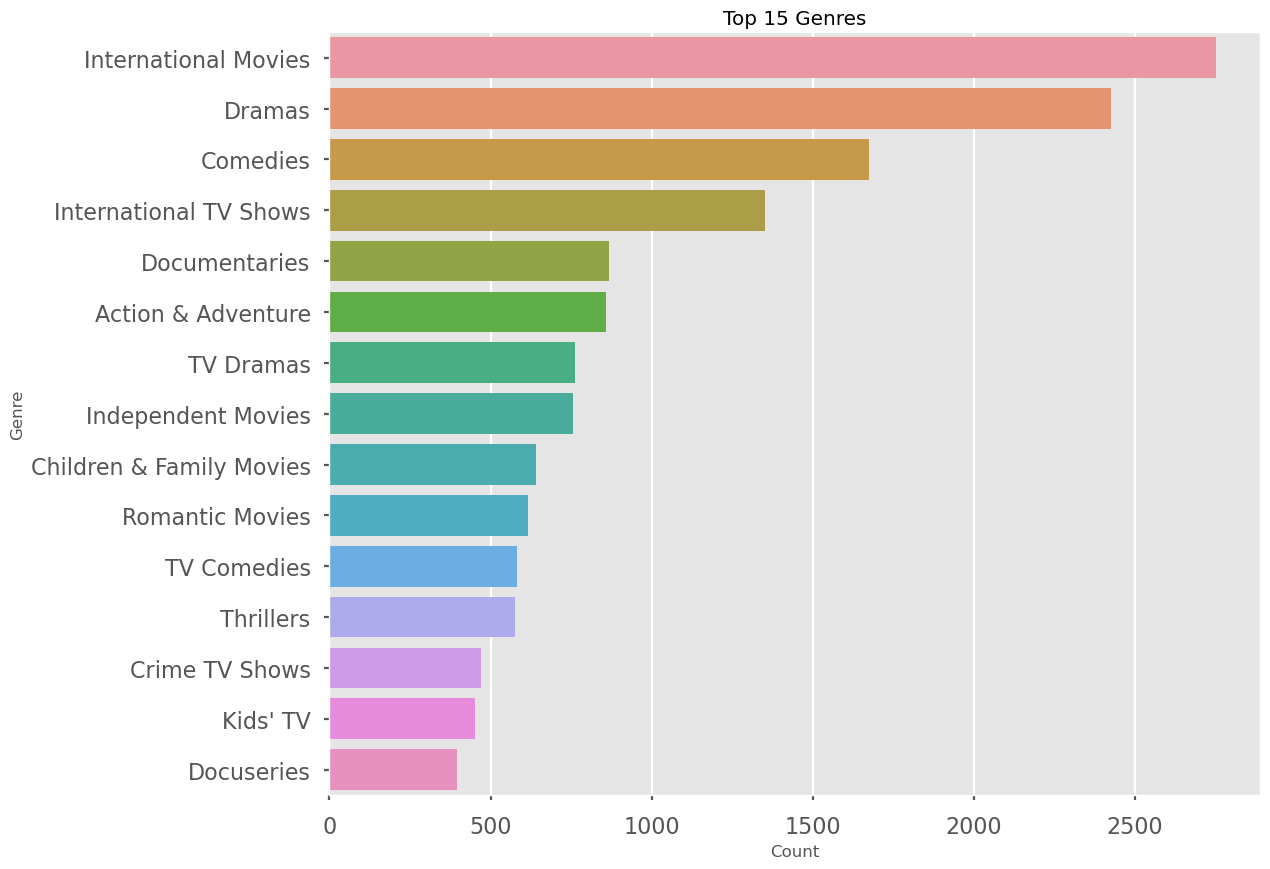

In [402]:
pop_genres = pd.DataFrame(list(listed_dict.items()), columns=['Genre','Count'])

pop_genres = pop_genres.sort_values(by='Count',ascending=False)

sns.color_palette("tab10")

a = sns.barplot(data=pop_genres[:15], y='Genre', x='Count')

ax = a.axes
ax.tick_params(axis='y', which='major', pad=10)

plt.title('Top 15 Genres')

plt.tight_layout()

## compare the months when netflix addes the most content:

In [109]:
month_df = df[['date_added','type']].copy()
month_df.dropna(inplace=True)
month_df['date_added'] = month_df['date_added'].apply(lambda x:int(x.month))

In [117]:
month_grp = pd.DataFrame(month_df.groupby(['date_added','type']).
                         value_counts()).rename(columns={0:'count'})

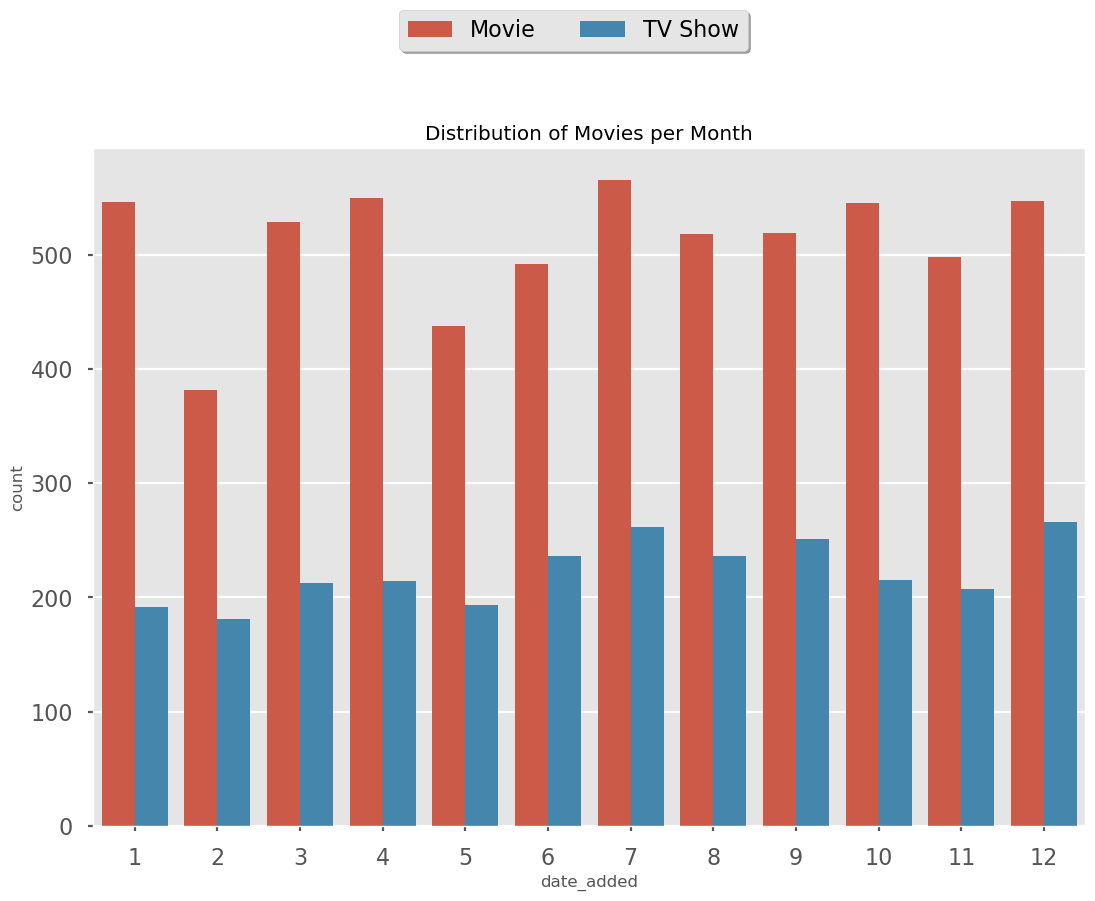

In [401]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

sns.color_palette("tab10")

ax,plot = plt.subplots()

a = sns.barplot(data=month_grp.reset_index(),x='date_added',y='count',hue='type')
a.legend_.remove()

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

plt.title('Distribution of Movies per Month')

plt.show()

## Find the popular durations for a TV show :

In [201]:
duration = pd.DataFrame(df[df['type'] == 'TV Show']['duration'].apply(lambda x:x.split(' ')[0]).value_counts()).reset_index()

In [202]:
duration = duration.rename({'index':'# of seasons','duration':'count'},axis=1)

In [203]:
duration

,# of seasons,count
0,1,1793
1,2,425
2,3,199
3,4,95
4,5,65
5,6,33
6,7,23
7,8,17
8,9,9
9,10,7


Text(0.5, 1.0, 'Distribution of Movies Based On Duration')

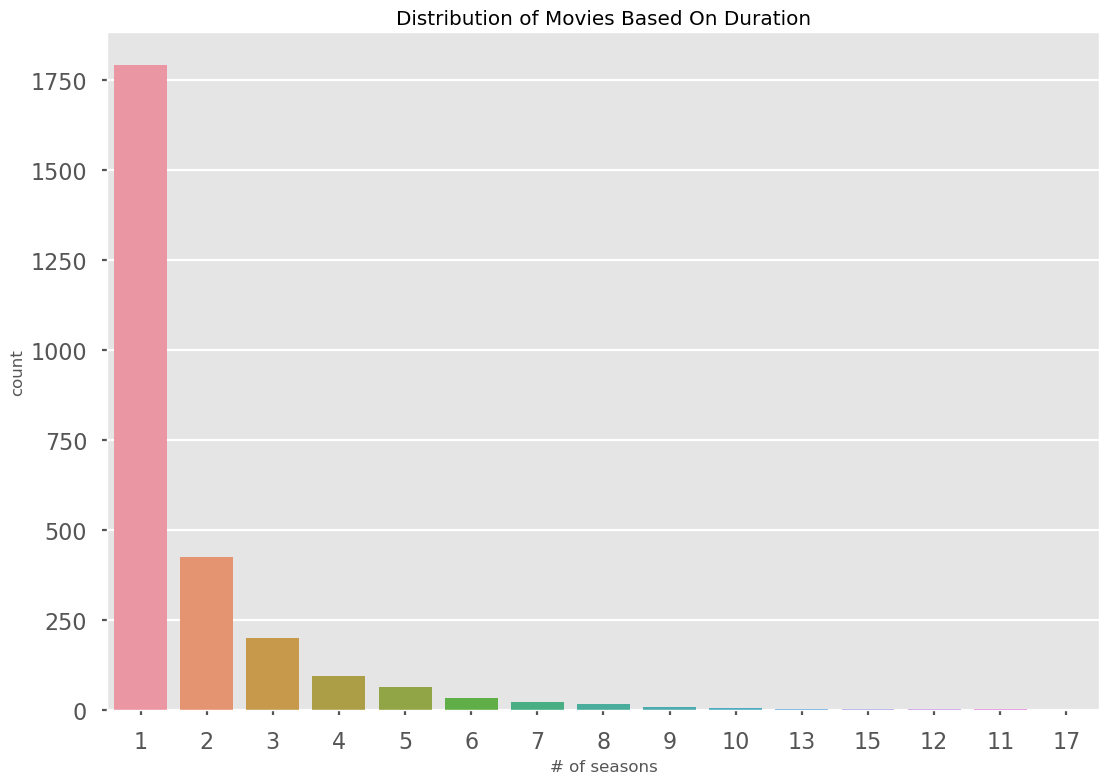

In [400]:
sns.color_palette("tab10")

ax,plot = plt.subplots()

a = sns.barplot(data=duration,x='# of seasons',y='count')

plt.title('Distribution of Movies Based On Duration')

In [248]:
df['description']

show_id
1       As her father nears the end of his life, filmm...
2       After crossing paths at a party, a Cape Town t...
3       To protect his family from a powerful drug lor...
4       Feuds, flirtations and toilet talk go down amo...
5       In a city of coaching centers known to train I...
                              ...                        
8803    A political cartoonist, a crime reporter and a...
8804    While living alone in a spooky town, a young g...
8805    Looking to survive in a world taken over by zo...
8806    Dragged from civilian life, a former superhero...
8807    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8805, dtype: object

In [251]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alenjose/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [259]:
df['description'].str.replace('[^\w\s]','',regex=False).str.lower()

show_id
1       as her father nears the end of his life, filmm...
2       after crossing paths at a party, a cape town t...
3       to protect his family from a powerful drug lor...
4       feuds, flirtations and toilet talk go down amo...
5       in a city of coaching centers known to train i...
                              ...                        
8803    a political cartoonist, a crime reporter and a...
8804    while living alone in a spooky town, a young g...
8805    looking to survive in a world taken over by zo...
8806    dragged from civilian life, a former superhero...
8807    a scrappy but poor boy worms his way into a ty...
Name: description, Length: 8805, dtype: object

In [257]:
df['clean_description'] = df['description'].str.replace('[^\w\s]','',regex=False).str.lower()
stop_words = set(stopwords.words('english'))
df['clean_description'] = df['clean_description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [258]:
df['clean_description']

show_id
1       father nears end life, filmmaker kirsten johns...
2       crossing paths party, cape town teen sets prov...
3       protect family powerful drug lord, skilled thi...
4       feuds, flirtations toilet talk go among incarc...
5       city coaching centers known train india’s fine...
                              ...                        
8803    political cartoonist, crime reporter pair cops...
8804    living alone spooky town, young girl befriends...
8805    looking survive world taken zombies, dorky col...
8806    dragged civilian life, former superhero must t...
8807    scrappy poor boy worms way tycoon's dysfunctio...
Name: clean_description, Length: 8805, dtype: object

In [262]:
nltk.download('punkt')

In [263]:
# Tokenize data
df['tokens'] = df['clean_description'].apply(word_tokenize)

In [264]:
df['tokens']

show_id
1       [father, nears, end, life, ,, filmmaker, kirst...
2       [crossing, paths, party, ,, cape, town, teen, ...
3       [protect, family, powerful, drug, lord, ,, ski...
4       [feuds, ,, flirtations, toilet, talk, go, amon...
5       [city, coaching, centers, known, train, india,...
                              ...                        
8803    [political, cartoonist, ,, crime, reporter, pa...
8804    [living, alone, spooky, town, ,, young, girl, ...
8805    [looking, survive, world, taken, zombies, ,, d...
8806    [dragged, civilian, life, ,, former, superhero...
8807    [scrappy, poor, boy, worms, way, tycoon, 's, d...
Name: tokens, Length: 8805, dtype: object

In [270]:
all_words = []

def func(lst):
    for i in lst:
        words.append(i)
        
df['tokens'].apply(lambda x:func(x))

show_id
1       None
2       None
3       None
4       None
5       None
        ... 
8803    None
8804    None
8805    None
8806    None
8807    None
Name: tokens, Length: 8805, dtype: object

In [274]:
print(all_words[:20])

['father', 'nears', 'end', 'life', ',', 'filmmaker', 'kirsten', 'johnson', 'stages', 'death', 'inventive', 'comical', 'ways', 'help', 'face', 'inevitable', '.', 'crossing', 'paths', 'party']


In [278]:
cleaned_all_words = []

for i in all_words:
    if len(i) > 2:
        cleaned_all_words.append(i)

In [279]:
freq_dist = FreqDist(cleaned_all_words)
freq_dist

FreqDist({'life': 785, 'young': 728, 'new': 699, 'family': 632, 'world': 545, 'man': 519, 'love': 498, 'two': 495, 'woman': 481, 'friends': 443, ...})

## Sentiment Analysis :

In [282]:
df['tokens']

show_id
1       [father, nears, end, life, ,, filmmaker, kirst...
2       [crossing, paths, party, ,, cape, town, teen, ...
3       [protect, family, powerful, drug, lord, ,, ski...
4       [feuds, ,, flirtations, toilet, talk, go, amon...
5       [city, coaching, centers, known, train, india,...
                              ...                        
8803    [political, cartoonist, ,, crime, reporter, pa...
8804    [living, alone, spooky, town, ,, young, girl, ...
8805    [looking, survive, world, taken, zombies, ,, d...
8806    [dragged, civilian, life, ,, former, superhero...
8807    [scrappy, poor, boy, worms, way, tycoon, 's, d...
Name: tokens, Length: 8805, dtype: object

In [283]:
def clean(lst):
    clean_list = []
    for i in lst:
        if(len(i) > 2):
            clean_list.append(i)
    return clean_list

In [285]:
df['tokens'] = df['tokens'].apply(lambda x:clean(x))

In [288]:
df['tokens'].apply(lambda x:FreqDist(x).most_common(10))

show_id
1       [(father, 1), (nears, 1), (end, 1), (life, 1),...
2       [(crossing, 1), (paths, 1), (party, 1), (cape,...
3       [(protect, 1), (family, 1), (powerful, 1), (dr...
4       [(orleans, 2), (feuds, 1), (flirtations, 1), (...
5       [(city, 1), (coaching, 1), (centers, 1), (know...
                              ...                        
8803    [(political, 1), (cartoonist, 1), (crime, 1), ...
8804    [(living, 1), (alone, 1), (spooky, 1), (town, ...
8805    [(looking, 1), (survive, 1), (world, 1), (take...
8806    [(dragged, 1), (civilian, 1), (life, 1), (form...
8807    [(scrappy, 1), (poor, 1), (boy, 1), (worms, 1)...
Name: tokens, Length: 8805, dtype: object

In [291]:
nltk.download('vader_lexicon')

In [292]:
from nltk.sentiment import SentimentIntensityAnalyzer

# initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# function to get the sentiment polarity score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# apply the function to the cleaned descriptions
df['sentiment_score'] = df['clean_description'].apply(get_sentiment_score)

In [293]:
# classify the sentiment based on the sentiment score
def get_sentiment(sentiment_score):
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# apply the function to the sentiment scores
df['sentiment'] = df['sentiment_score'].apply(get_sentiment)

Text(0, 0.5, '')

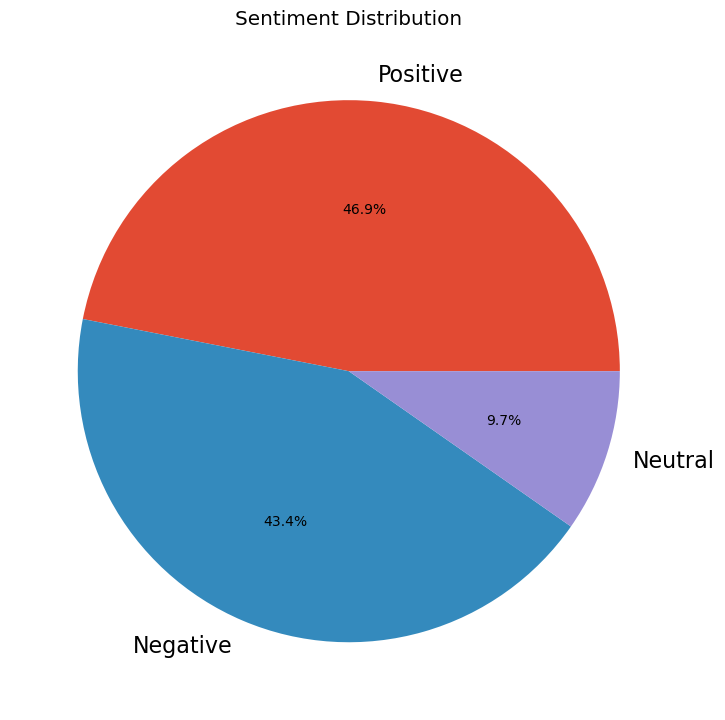

In [300]:
# Generate pie chart
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Set title and axis labels
plt.title('Sentiment Distribution')
plt.ylabel('')

In [312]:
df.head(2)

,type,title,country,release_year,date_added,director,cast,rating,listed_in,description,duration,duration_hours,clean_description,tokens,sentiment_score,sentiment
show_id,,,,,,,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,United States,2020,2021-09-25,Kirsten Johnson,NaN,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90 min,1 hr 30 min,"father nears end life, filmmaker kirsten johns...","[father, nears, end, life, filmmaker, kirsten,...",-0.2960,Negative
2,TV Show,Blood & Water,South Africa,2021,2021-09-24,not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2 Seasons,2 Seasons,"crossing paths party, cape town teen sets prov...","[crossing, paths, party, cape, town, teen, set...",-0.1531,Negative


In [307]:
df[df['listed_in'].str.contains('Cult Movies')]['sentiment'].value_counts()

Negative    33
Positive    28
Neutral     10
Name: sentiment, dtype: int64

In [308]:
df[df['listed_in'].str.contains('Comedies')]['sentiment'].value_counts()

Positive    1232
Negative     806
Neutral      217
Name: sentiment, dtype: int64

In [309]:
df[df['listed_in'].str.contains('Children')]['sentiment'].value_counts()

Positive    369
Negative    220
Neutral      52
Name: sentiment, dtype: int64

In [310]:
df[df['listed_in'].str.contains('Horror')]['sentiment'].value_counts()

Negative    329
Positive     81
Neutral      22
Name: sentiment, dtype: int64

In [322]:
sent = df[['date_added','sentiment_score']].dropna()

sent['date_added'] = sent['date_added'].apply(lambda x:int(x.year))

sent.head(5)

,date_added,sentiment_score
show_id,,
1,2021,-0.2960
2,2021,-0.1531
3,2021,-0.7783
4,2021,0.2263
5,2021,0.7506


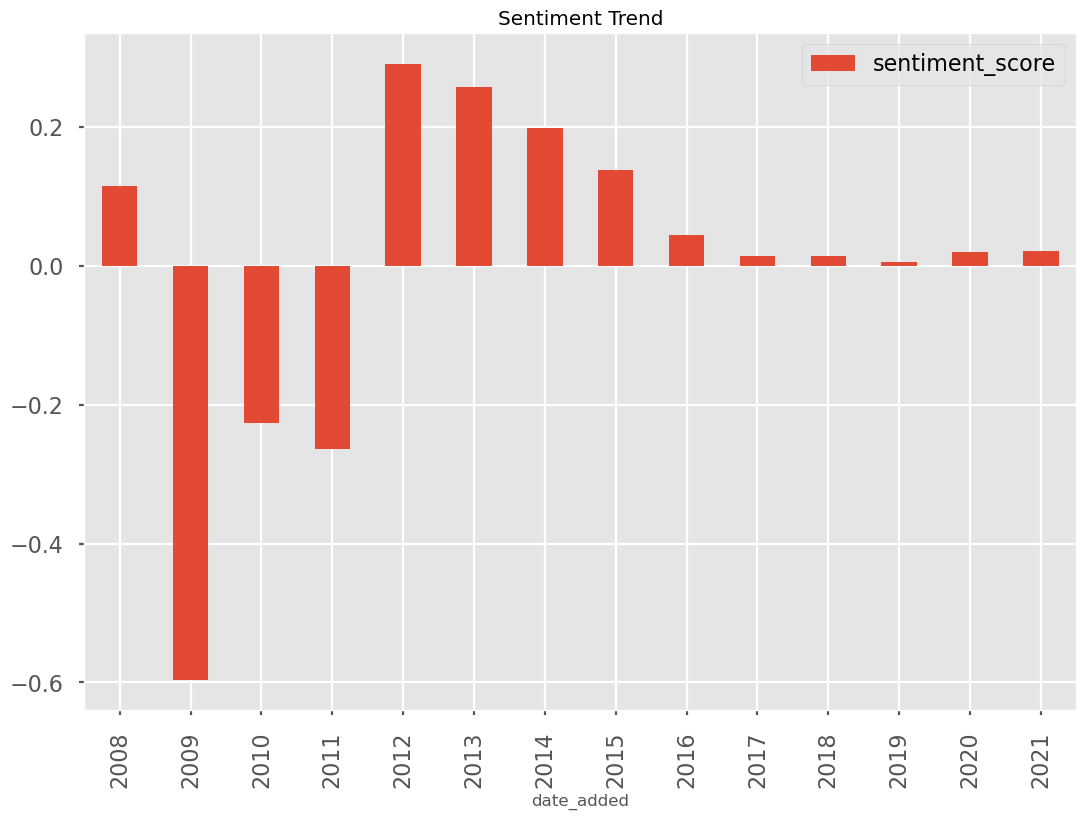

In [399]:
sent.groupby('date_added').mean().plot(kind='bar')

plt.title('Sentiment Trend')
plt.show()

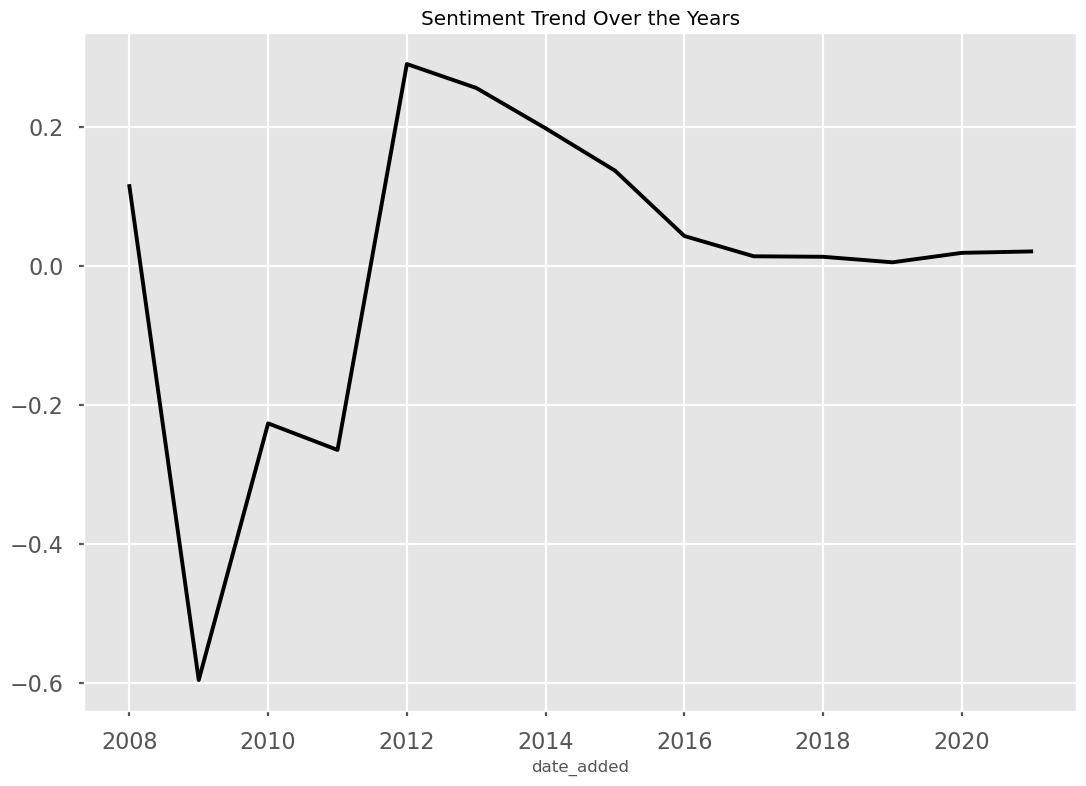

In [398]:
sent.groupby('date_added')['sentiment_score'].mean().plot(kind='line',color='black')

plt.title('Sentiment Trend Over the Years')
plt.show()

# Question : Find the top 5 actors/actresses : 

In [390]:
cast_df = df['cast'].dropna().str.split(',').apply(lambda x:remove_white(x))

In [391]:
cast_df = pd.DataFrame(cast_df)

cast_list = []
for index, row in cast_df.iterrows():
    for cast in row['cast']:
        cast_list.append(cast)

In [383]:
from collections import Counter

cast_counts = Counter(cast_list)

In [392]:
pop_cast = pd.DataFrame(list(cast_counts.items()), columns=['Cast','Acted_In']).sort_values(by='Acted_In',ascending=False)

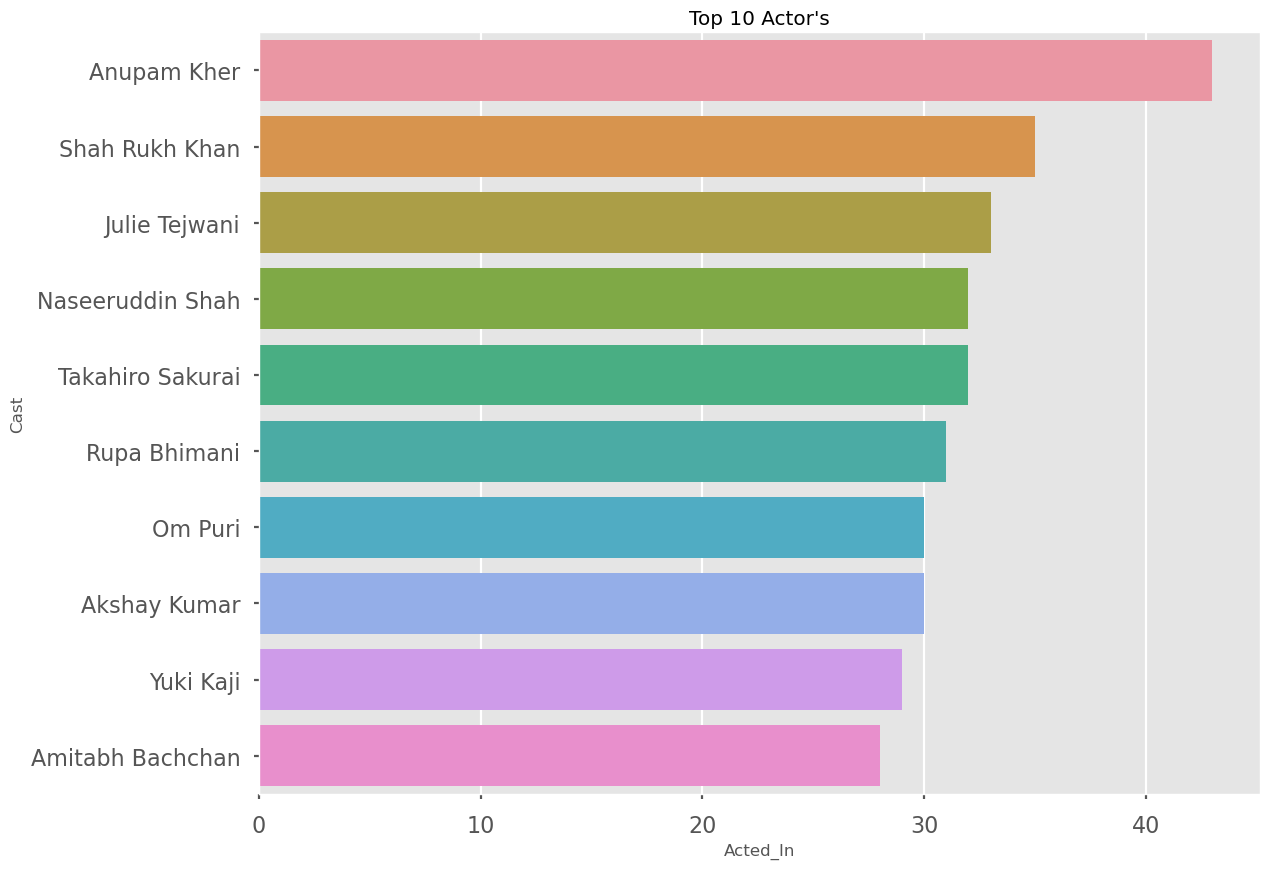

In [397]:
sns.color_palette("tab10")

a = sns.barplot(data=pop_cast[:10], y='Cast', x='Acted_In')

ax = a.axes
ax.tick_params(axis='y', which='major', pad=10)

plt.title("Top 10 Actor's")

plt.tight_layout()